In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 9s 2us/step


In [3]:
# class names are not included
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# training data
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [9]:
train_labels[0]

9

In [10]:
train_images = train_images / 255
test_images = test_images / 255

In [11]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<function matplotlib.pyplot.show(close=None, block=None)>

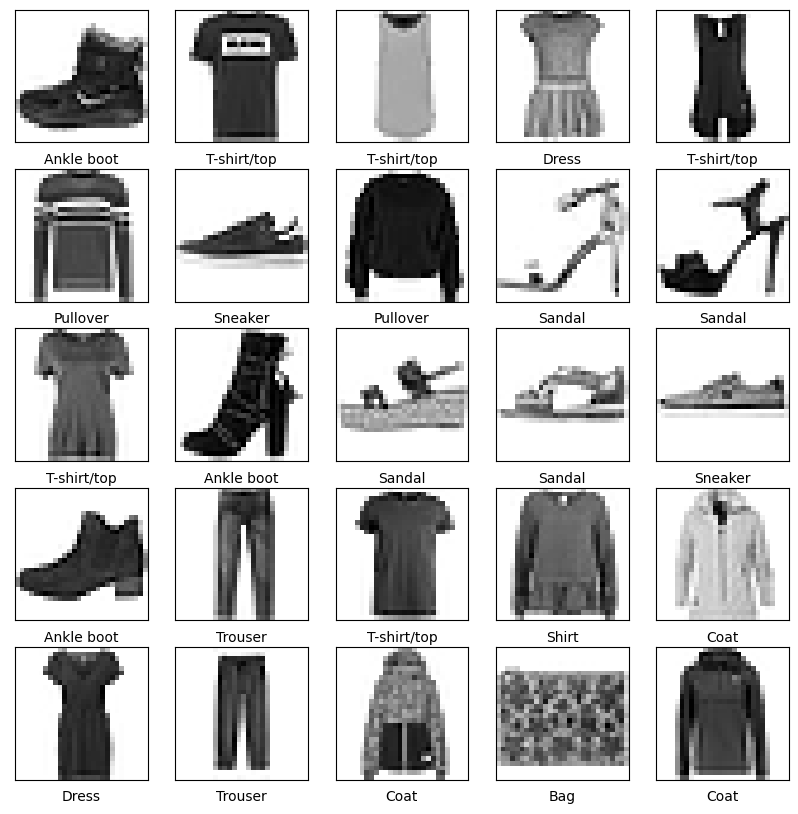

In [12]:
# verify data is in correct format
plt.figure(figsize =(10, 10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

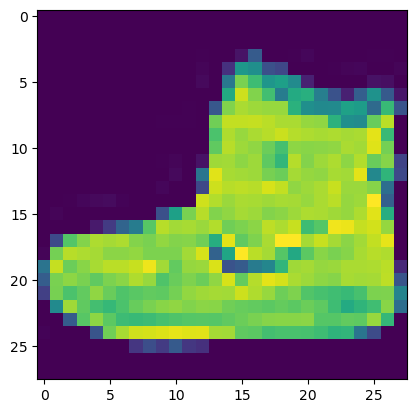

In [13]:
plt.imshow(train_images[0])

In [14]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [15]:
train_images.shape

(60000, 28, 28, 1)

In [16]:
test_images.shape

(10000, 28, 28, 1)

In [17]:
train_labels.shape

(60000,)

In [18]:
test_labels.shape

(10000,)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, Dense, Flatten, Dropout, MaxPool2D
)

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [22]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
history = model.fit(train_images, train_labels, epochs=1, verbose=1, validation_data=(test_images, test_labels))

1875/1875 [==============================] - 88s 45ms/step - loss: 0.5532 - accuracy: 0.7959 - val_loss: 0.3752 - val_accuracy: 0.8591


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.3752 - accuracy: 0.8591


In [25]:
print('test_loss = ' , test_loss)

test_loss =  0.37523552775382996


In [26]:
print('test_acc = ', test_acc)

test_acc =  0.8590999841690063
